# Bitcoin Price Prediction using RNN (LSTM)

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc_data = pd.read_csv('bitcoindata.csv', parse_dates=['Date'], index_col=['Date'])

In [3]:
btc_data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
btc_data

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [5]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(btc_data)

2787

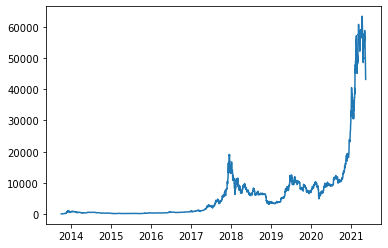

In [7]:
plt.plot(btc_data['Closing Price (USD)'])

In [8]:
btc_price_data = pd.DataFrame(btc_data['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})

In [9]:
btc_price_data

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


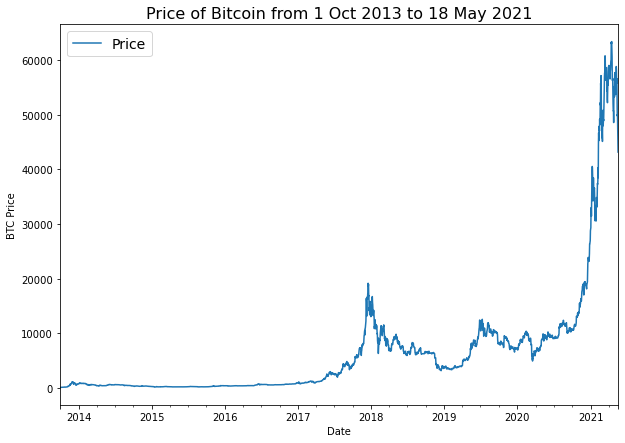

In [10]:
btc_price_data.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [11]:
btc_price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2787 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


In [12]:
btc_price_data.astype(np.float32)

,Price
Date,
2013-10-01,123.654991
2013-10-02,125.455002
2013-10-03,108.584831
2013-10-04,118.674660
2013-10-05,121.338661
...,...
2021-05-14,49764.132812
2021-05-15,50032.691406
2021-05-16,47885.625000


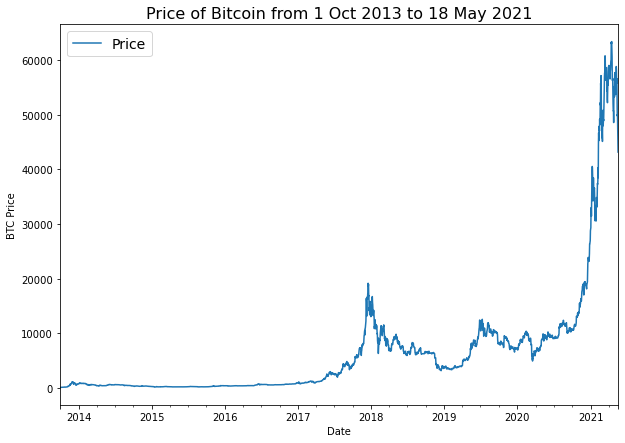

In [13]:
btc_price_data.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [14]:
btc_price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2787 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


In [15]:
btc_price_data.to_numpy()

array([[  123.65499   ],
       [  125.455     ],
       [  108.58483   ],
       ...,
       [47885.62525472],
       [45604.61575361],
       [43144.47129086]])

In [16]:
btc_price_data.index.to_numpy()

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
len(btc_price_data.to_numpy()) , len(btc_price_data.index.to_numpy())

(2787, 2787)

In [18]:
type(btc_price_data.index.to_numpy())

numpy.ndarray

In [19]:
from datetime import datetime

In [20]:
new_date = btc_price_data.index.to_numpy()

In [21]:
new_prices = btc_price_data.to_numpy()

In [22]:
type(new_date) , type(new_prices)

(numpy.ndarray, numpy.ndarray)

In [23]:
new_date.dtype, new_prices.dtype

(dtype('<M8[ns]'), dtype('float64'))

In [24]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(new_prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = new_date[:split_size], new_prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = new_date[split_size:], new_prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

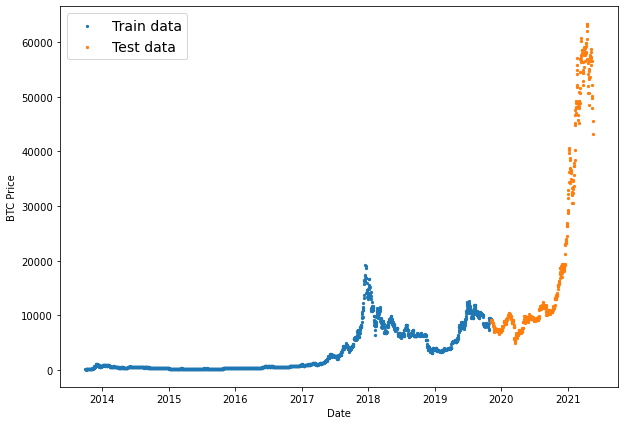

In [25]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [26]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

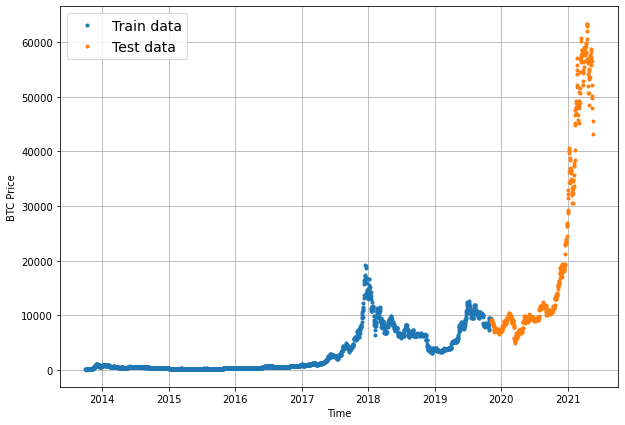

In [27]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [28]:
import tensorflow as tf

Why do we window?

Windowing is a method to turn a time series dataset into supervised learning problem.

In other words, we want to use windows of the past to predict the future.

In [29]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [30]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [31]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [32]:
btc_price_data

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [33]:
get_labelled_windows(new_prices)

(array([], shape=(2787, 0), dtype=float64),
 array([[  123.65499   ],
        [  125.455     ],
        [  108.58483   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [34]:
print(get_labelled_windows(new_prices))

(array([], shape=(2787, 0), dtype=float64), array([[  123.65499   ],
       [  125.455     ],
       [  108.58483   ],
       ...,
       [47885.62525472],
       [45604.61575361],
       [43144.47129086]]))


In [35]:
new_prices

array([[  123.65499   ],
       [  125.455     ],
       [  108.58483   ],
       ...,
       [47885.62525472],
       [45604.61575361],
       [43144.47129086]])

In [36]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [37]:
full_windows, full_labels = make_windows(new_prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [38]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]] -> Label: [[123.033]]
Window: [[125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]
 [123.033  ]] -> Label: [[124.049]]
Window: [[108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]
 [123.033  ]
 [124.049  ]] -> Label: [[125.96116]]


In [39]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [40]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [41]:
train_windows[:5], train_labels[:5]

(array([[[123.65499],
         [125.455  ],
         [108.58483],
         [118.67466],
         [121.33866],
         [120.65533],
         [121.795  ]],
 
        [[125.455  ],
         [108.58483],
         [118.67466],
         [121.33866],
         [120.65533],
         [121.795  ],
         [123.033  ]],
 
        [[108.58483],
         [118.67466],
         [121.33866],
         [120.65533],
         [121.795  ],
         [123.033  ],
         [124.049  ]],
 
        [[118.67466],
         [121.33866],
         [120.65533],
         [121.795  ],
         [123.033  ],
         [124.049  ],
         [125.96116]],
 
        [[121.33866],
         [120.65533],
         [121.795  ],
         [123.033  ],
         [124.049  ],
         [125.96116],
         [125.27966]]]),
 array([[[123.033  ]],
 
        [[124.049  ]],
 
        [[125.96116]],
 
        [[125.27966]],
 
        [[125.9275 ]]]))

In [42]:
from tensorflow.keras import layers

In [44]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels))

In [45]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [46]:
# Load in best version of model 5 and evaluate on the test data
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 591.9929 - accuracy: 0.0000e+00


[591.992919921875, 0.0]

In [47]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8979.331, 8825.949, 9037.236, 8844.601, 8750.06 , 8809.2  ,
       8745.459, 8551.659, 8526.647, 8555.058], dtype=float32)>

In [48]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [49]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [50]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 591.9929,
 'mse': 1251620.4,
 'rmse': 1118.7584,
 'mape': 2.672517,
 'mase': 1.0399675}

In [62]:
1.96 * model_5_results['rmse']


2192.7665087890623

In [72]:
test_labels.shape, model_5_preds.numpy().reshape(556,1,1).shape

((556, 1, 1), (556, 1, 1))

In [80]:
X_test.shape

(558,)

(558, 1)

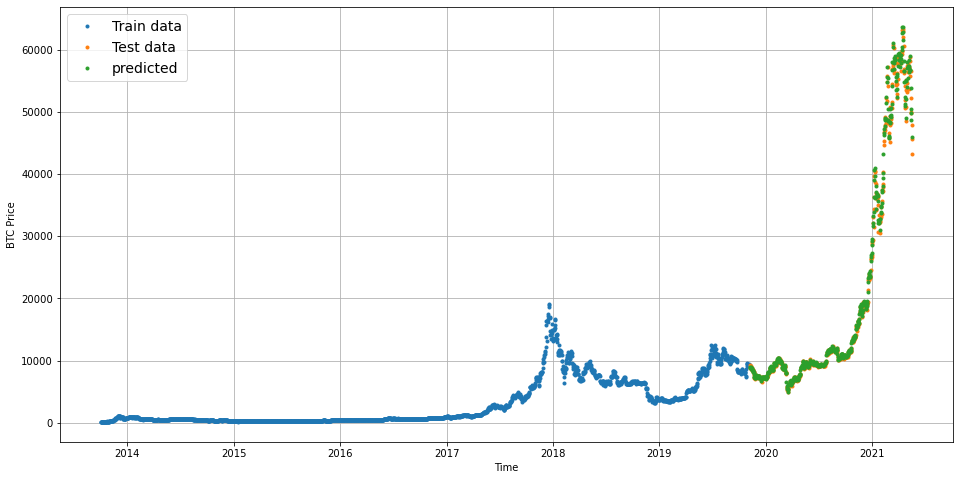

In [84]:
plt.figure(figsize=(16, 8))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[:-2], values=model_5_preds.numpy().reshape(556,1), label='predicted')
y_test.shape